# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We **TEAM 6**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).



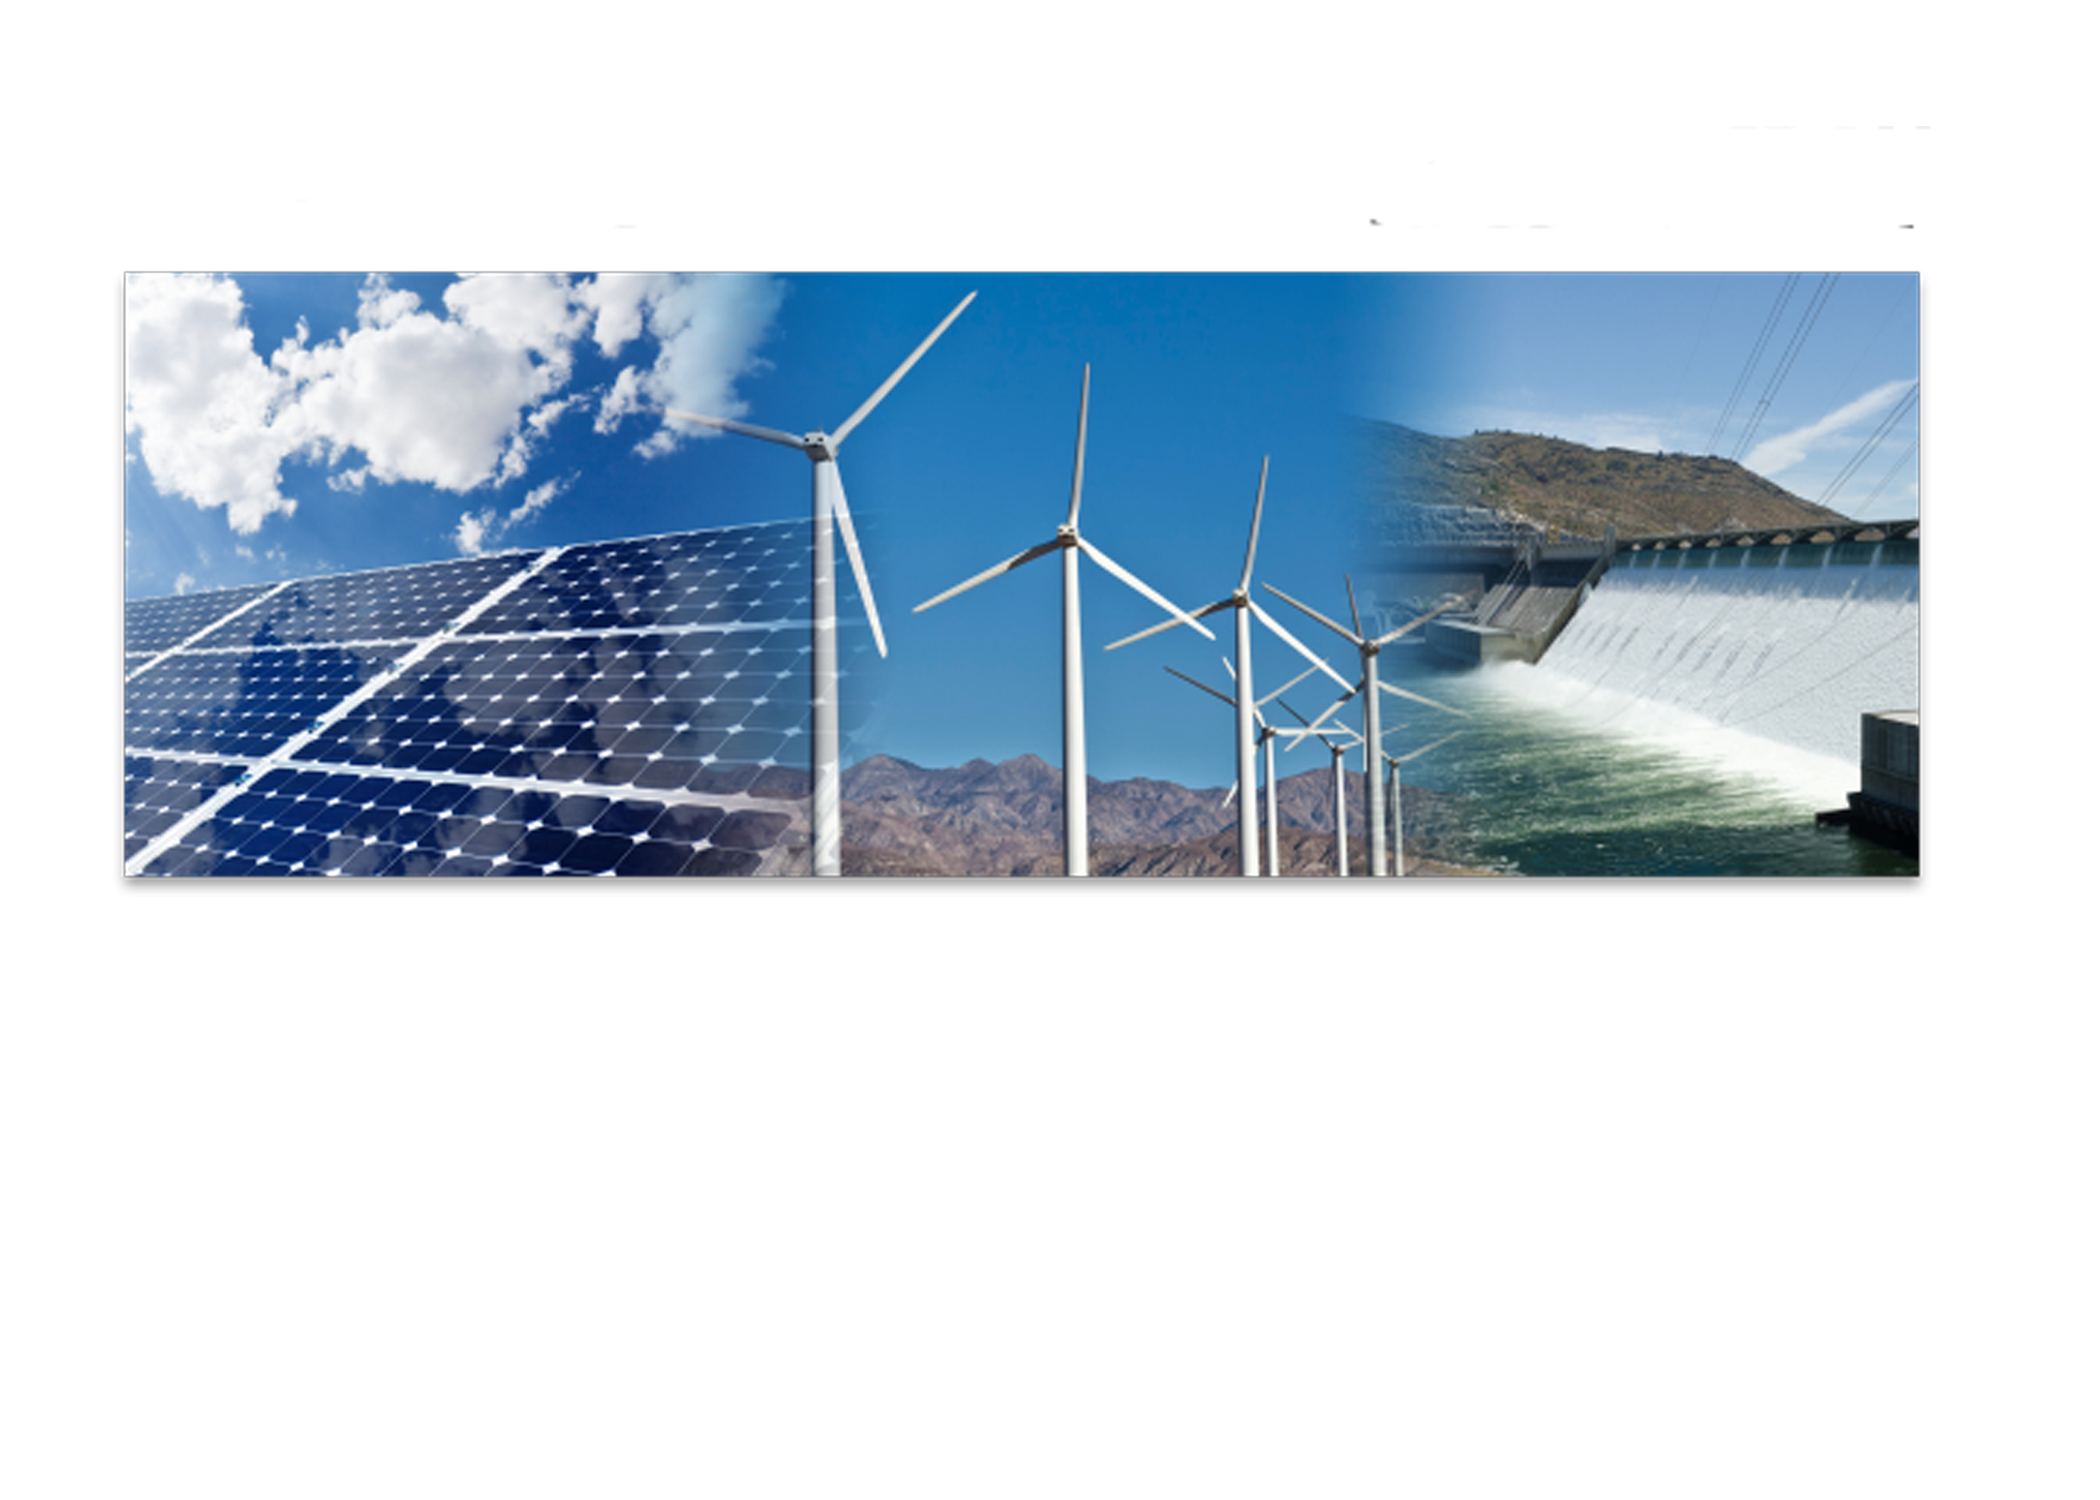

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Loading Data</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Data Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

<a href=#one>9. Conclusion</a>

 <a id="one"></a>
## 1. Introduction




Renewable energy is produced from natural resources that regenerate themselves in less than a human lifetime without destroying the planet's resources. These resources, such as sunlight, wind, rain, tides, waves, biomass, and thermal energy. They have the advantage of being practically everywhere available in one form or another.  What's more, they don't have much of an impact on the climate.  Renewable energy sources help cities' energy infrastructures become less reliant on external sources and grids. Businesses and industries invest in renewable energy to avoid outages, especially weather-related disruptions.

Spain has a population of 47.1 million people, all of whom rely on energy to carry out their daily tasks. Energy in general and electricity specifically are critical for economic development. The country is currently experiencing electricity outages and the increase in electricity prices. Spain is Europe's sixth-largest energy consumer, and it imports the majority of its fuel. This is due to a shortage of readily available petroleum supplies. However, Spain is one of the countries that has started working actively to reduce reliance on fossil fuels. According to the Energy Policy Review for Spain 2021. The current Spanish energy and climate policy framework is based on the 2050 goals of national climate neutrality, 100% renewable energy in the electricity mix, and 97% renewable energy in the total energy mix. As a result, it is focused on rapid growth of renewable energy, energy efficiency, electrification, and renewable hydrogen. Wind energy has become a major part of the renewable energy sector, but solar photovoltaics are still coming up, despite the vastness of solar resources.


As governments attempt to diversify their energy portfolios and increase their reliance on greener energy, they are confronted with one key issue. Solar and wind, the two most common renewable energy sources, are inherently variable. The electricity provided by a solar panel or a wind turbine is never consistent and is determined by a variety of uncontrollable external factors such as solar radiation intensity, cloud cover, and wind speed.The aim of this predict is to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. Looking at the data collected from five major cities: Barcelona, Bilbao, Madrid, Seville and Valencia and their weather features such as pressure, wind speed, humidity, rain and more. 



 <a id="one"></a>
## 2. Importing Packages




In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso,\
LassoLars, BayesianRidge
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import pickle    # to save and restore models

# for statistical testing
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 13

<a id="two"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>


In [ ]:
train_df = pd.read_csv('df_train.csv')
pd.set_option("display.max.columns", None)
# Drop 'Unnamed: 0 ' column as it serves no purpose
train_df.drop('Unnamed: 0', axis= 1, inplace= True)
pd.set_option("display.max.rows", None)

<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>




Exploratory data analysis (EDA) is used to analyse and investigate data sets and summarize their main characteristics, often employing data visualization methods. In this section, weather, and load shortfall data of the 5 cities in Spain will be explored using the following techniques:

- Univeriate Non-graphical – Descriptive statistics and Five number summary

- Univariate Graphical Analysis – Histogram, Density plot and  Box plots

- Multivariate Graphics Analysis – Heat map 


**4.1 Univariate Non-graphical Analysis**

- Look at data statistics

In [ ]:
train_df.head()

In [ ]:
print('There are', len(train_df), 'rows and',train_df.shape[1], 'columns in the train set.')

In [ ]:
train_df.info()

In [ ]:
train_df.describe()

In [ ]:
# plot relevant feature interactions

**4.2 Univariate Graphical Analysis**

The techniques below are used to understand each attribute independently. 


- Histogram

Histograms group data into bins and provide a count of the number of observations in each bin. From the shape of the bins one can tell whether an attribute is Gaussian’, skewed or even has an exponential distribution. It also assist at identifying possible outliers.

In [ ]:
train_df.hist(figsize=(20,20))
plt.show()

From the observation above **Madrid_wind_speed**, **Seville_wind_speed** and **Bilbao _wind_speed** have exponetial distribution. **Madrid_temp_max** has a Gaussian or nearly Gaussian distribution.This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.


- Density Plots

Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms.

In [ ]:
train_df.plot(kind= 'density', subplots=True, layout=(13,4), sharex= False, figsize= (20,50))
plt.show()

- Box and Whisker Plots

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box 
around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of 
the middle 50% of the data).

In [ ]:
train_df.plot(kind='box', subplots=True, layout=(12,4), sharex=False, sharey=False, figsize= (20,50))
plt.show()


From the plots used above, the data distribution for each attribute is clearer in the box plots than the histograms.

**4.3 Multivariate Graphic Analysis**

This section shows examples of plots with interactions between multiple variables.

- Correlation Matrix Plot

Correlation gives an indication of how related the changes are between two variables. When two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated.

The correlation between each pair of attributes can be calculated.This is called a correlation matrix and it can be plotted to in order to see which variables are correlated to each other. This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance when there are highly correlated input variables in your data.

In [ ]:
correlations = train_df.corr()
names = train_df.columns
fig = plt.figure(figsize= (20,20))
ax = fig.add_subplot(111)

cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,48,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation = 45)
ax.set_yticklabels(names)
plt.show()

From the observation above the matrix is symmetrical, the bottom left of the matrix is the same as the top right. This is useful as one is able to see the two different views on the same data in one plot. Each variable is perfectly positively correlated with each other in the diagonal line from top left to bottom right.

- Pearson Correlation Heatmap

This is similar to Correlation Matrix Plot but it is filled, the Pearson correlation between (1, -1). Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based
on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.




In [ ]:
# Strength of Association
#         Positive     Negative
#small   .1 to .3      -.1 to -.3
#medium  3. to .5      -.3 to -.5
#large    .5 to 1       -.5 to -1

corr_matrix = train_df.corr(method="pearson")
plt.figure(figsize=(50,30))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [ ]:
# evaluate correlation

In [ ]:
# see above

In [ ]:
# have a look at feature distributions

In [ ]:
# see above

<a id="four"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>


**5.1 Checking for Missing Values** 

In [ ]:
# check for null values

train_df.isnull().sum()

About **2068** values in the **Valencia_pressure** column are missing. Which is about 24% of the data missing in that attribute. Therefore data (either the mean or median) wll be imputed into the missing values. 

Checking which values to impute: 

In [ ]:
print('mean of Valencia_pressure col:', train_df['Valencia_pressure'].mean())
print('median of Valencia_pressure col:', train_df['Valencia_pressure'].median())


# The mean an median of the column containting null values is similar,
# thus the null value will be replaced with the mean.

train_df['Valencia_pressure'] = train_df['Valencia_pressure'].fillna(train_df['Valencia_pressure'].mean())

**5.2 Checking for Different Data Types** 

Considering the EDA above not all the columns have the same data types such as the Valencia_wind_deg and Seville_pressure:

In [ ]:
# Check dtype of Valencia_wind_deg and why it is an object compared to similar
# numeric columns.

print('dtype of Valencia_wind_deg:',train_df['Valencia_wind_deg'].dtype)
print('unique values of Valencia_wind_deg:', train_df['Valencia_wind_deg'].unique())
train_df[['Valencia_wind_deg','Bilbao_wind_deg', 'Barcelona_wind_deg']].head()

Valencia_wind_deg column data contain strings and is not comparable to similar colomns, because there are similar columns with the required numerical data, Valencia_wind_deg column will be dropped.

In [ ]:
# Check dtype of Seville_pressure and why it is an object compared to similar
#  numeric columns. 

print('dtype of Seville_pressure:',train_df['Seville_pressure'].dtype)
print('unique values of Seville_pressure:', train_df['Seville_pressure'].unique())
train_df[['Seville_pressure','Barcelona_pressure', 'Bilbao_pressure']].tail()

Seville_pressure column data contain strings and is not comparable to similar colomns, because there are similar columns with the required numerical data, Seville_pressure column will be dropped.

In [ ]:
# both Valencia_wind_deg and Seville_pressure dropped
train_df.drop('Valencia_wind_deg', axis= 1, inplace= True)
train_df.drop('Seville_pressure', axis= 1, inplace= True)

**5.3 Create New Features**

- Time Based Feature 

In [ ]:
# Transform train_df['time'] to datetime

train_df['time'] = pd.to_datetime(train_df['time'], format = '%Y-%m-%d %H:%M:%S')

Splitting the time column in order to see if year, month, day and hour, have a significant Pearson correlation.

In [ ]:
#train_df['year'] = train_df['time'].dt.year     -year value is arbitrary where power is concerned
train_df['month'] = train_df['time'].dt.month   # power varies per month depending on season
train_df['day'] = train_df['time'].dt.day       # power varies depending on day of the week
train_df['hour'] = train_df['time'].dt.hour     # power varies depending on the time of the day

In [ ]:
train_df[['month', 'day', 'hour']] = train_df[['month', 'day', 'hour']].astype('category')

In [ ]:
# engineer existing features

In [ ]:
#train_df[['Valencia_wind_deg','Seville_pressure']].head()

In [ ]:
#train_df = pd.get_dummies(train_df,columns = ['Valencia_wind_deg'])

In [ ]:
#train_df = pd.get_dummies(train_df,columns = ['Seville_pressure'])

In [ ]:
# If we look at the Pearson Correlation above we can see that most
# variables from the get_dummies df is non significant,therefore we will
# drop thses columns

# If get_dummies is run, reset kernel to get original data back.

**5.4 Calculate Features Importance**


I section a  correlation between 2 variables will be tested in order to select an important attribute. Since they are both numerical, Pearson’s Correlation Coefficient will be tested:
- Assuming that two variables are independent (null hypothesis), it tests whether two samples have a linear relationship.
- If the p-value is small enough (<0.05), the null hypothesis can be rejected and we can say that the two variables are probably dependent.



In [ ]:
train_df.info()

In [ ]:
x = [col for col in train_df.drop('load_shortfall_3h',axis= 1).columns]
x_col = x[1:]       # This is to remove time variable
y = "load_shortfall_3h"

p_corr_list = []    # This is a list of all the features with a Pearson corr > 0.1 and < -0.1.
                    # This is to ensure there is atleast a small correlation.
for x in x_col:
    coeff, p = scipy.stats.pearsonr(train_df[x], train_df[y])
    coeff, p = round(coeff, 3), round(p, 3)
    conclusion = "Significant" if p < 0.05 else "Non-Significant"
    print(x, " Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")
    if coeff <= -0.1 or coeff >= 0.1:
        p_corr_list.append(x)



In [ ]:
print(len(p_corr_list))

print(p_corr_list)


According Pearson Correlation all the features are Significant:

The largerst correlation is 'Valencia_temp_min' = 0.0.202,

There are 25 variables in p_corr_list with a corr of > 0.1 or <-0.1

In [ ]:
rain_1h_columns = ['Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h']

# Percentage unique values in all rain_1h columns
# As we can see the unique percentage is less than 1%.
# Thus only less than 1% of the values is unique.

# Drop these columns and test models to see if there is a difference.

# Model performance did increase slightly, thus drop columns.

(train_df[rain_1h_columns].nunique()/ 8763) *100



In [ ]:
weather_id_columns = ['Madrid_weather_id','Barcelona_weather_id','Seville_weather_id', 'Bilbao_weather_id']

# Percentage unique values in all weather_id columns
# As we can see the unique percentage is 4% or less.
# Thus only 4% or less of the values is unique.

# Drop these columns and test models to see if there is a difference.

# Model performance did decrease slightly, Thus weather_id_columns will not be dropped.

(train_df[weather_id_columns].nunique()/ 8763) *100

**5.5 Selecting Features per Model**

In this section, three groups of features are selected in order to identify which group of features produce the best model.

- Group 1 features will be used on all  _model_1 models.

In [ ]:
# Group 1 feature selection

# This is the standard model, features will be added and remove from train_df_1.

train_df_1 = train_df.copy()

train_df_1 = train_df_1.drop('time', axis= 1)
# date time object cannot be use in the model.
train_df_1.shape


# train_df_1.columns = ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
#                       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
#                       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
#                       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
#                       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
#                       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
#                       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
#                       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
#                       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
#                       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
#                       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
#                       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
#                       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
#                       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
#                       'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h', 'month', 'day',
#                       'hour']

# Features fr api test
#train_df_1 = train_df_1[['Madrid_wind_speed','Bilbao_rain_1h','Valencia_wind_speed','load_shortfall_3h']]

In [ ]:
train_df_1.columns

- Group 2 features will be used on all _model_2 models.

In [ ]:
# Group 2 feature selection

train_df_2 = train_df_1.drop(rain_1h_columns, axis=1)    # Drop coulmns with postfix rain_1h_columns, that may represent hourly data
                                                         # on a 3 hourly data set.
                                                         # Model performance increaed slightly.

#train_df_2 = train_df_2.drop(weather_id_columns, axis=1)  # Drop weather_id_columns
                                                          # Model performance did decrease slightly, Thus weather_id_columns will not be dropped. 

train_df_2.shape


In [ ]:
train_df_2.columns

- Group 3 features will be used on all _model_3 models. 

In [ ]:
# Group 3 feature selection
# Here we will use the features in p_corr_list.
# Features in this list have a pearonson corr score of >0.1 and <-0.1.

train_df_3 = train_df_1[p_corr_list] 
train_df_3['load_shortfall_3h'] = train_df_1['load_shortfall_3h']

train_df_3.shape


# Featurs for all model 3

#train_df_3 = train_df_1[['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
#                           'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
#                           'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
#                           'Seville_temp_max', 'Valencia_temp_max', 'Valencia_temp',
#                           'Bilbao_weather_id', 'Seville_temp', 'Valencia_temp_min',
#                           'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
#                           'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
#                           'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
#                           'month', 'hour', 'load_shortfall_3h']]

In [ ]:
train_df_3.columns

In [ ]:
# So far Model 1 and Model 3 features produce the best results for
# LinearRegression() model. 

<a id="five"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>


**6.1 Splitting the Data**

In [ ]:
#Split 1 for 

y1 = train_df_1['load_shortfall_3h']
X1 = train_df_1.drop('load_shortfall_3h', axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state= PARAMETER_CONSTANT)

#scaler = StandardScaler()
#scaler.fit(X_train)  #  - fit only on training data
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
# Split 2

y2 = train_df_2['load_shortfall_3h']
X2 = train_df_2.drop('load_shortfall_3h', axis= 1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state= PARAMETER_CONSTANT)


In [ ]:
# Split 3

y3 = train_df_3['load_shortfall_3h']
X3 = train_df_3.drop('load_shortfall_3h', axis= 1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state= PARAMETER_CONSTANT)

#scaler3 = StandardScaler()
#scaler3.fit(X_train3)  # - fit only on training data
#X_train = scaler3.transform(X_train3)
#X_test = scaler3.transform(X_test3)

**6.2 Machine Learning Models**

**1. Linear Regression Models**

In [ ]:
# # LinearRegression Model 1

linear_model_1 = LinearRegression()     # Initialize the mdoel

linear_model_1.fit(X_train,y_train)   #training the algorithm

linear_model_1_pred = linear_model_1.predict(X_test)  # predicting the result

In [ ]:
# this model will be pickled and implemented in the api,

model_save_path = 'linear_model_1.pkl'

with open(model_save_path, 'wb') as file:
    pickle.dump(linear_model_1, file)

In [ ]:
# Table of Predicted values and Actula values:

df1 = pd.DataFrame({'Actual': y_test, 'Predicted':linear_model_1_pred })
df1.head()

In [ ]:
# Histogram of a subset of Predicted values and Actula values:

df1_plot = df1.head(25)
df1_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

In [ ]:
 #LinearRegression Model 2


linear_model_2 = LinearRegression()     # Initialize the mdoel

linear_model_2.fit(X_train2,y_train2)   #training the algorithm

linear_model_2_pred = linear_model_2.predict(X_test2)  # predicting the result

In [ ]:
# LinearRegression Model 3

linear_model_3 = LinearRegression()     # Initialize the mdoel

linear_model_3.fit(X_train3,y_train3)   #training the algorithm

linear_model_3_pred = linear_model_3.predict(X_test3)  # predicting the result

**2. Ridge Models**


In [ ]:
# ridge_model_1

ridge_model_1 = Ridge(alpha = 0.5)
ridge_model_1.fit(X_train,y_train)
ridge_model_1_pred = ridge_model_1.predict(X_test)

In [ ]:
# ridge_model_2

ridge_model_2 = Ridge(alpha = 0.5)
ridge_model_2.fit(X_train2,y_train2)
ridge_model_2_pred = ridge_model_2.predict(X_test2)

In [ ]:
# ridge_model_3

ridge_model_3 = Ridge(alpha = 0.5)
ridge_model_3.fit(X_train3,y_train3)
ridge_model_3_pred = ridge_model_3.predict(X_test3)

**3. RidgeCV Models**


In [ ]:
# ridgeCV_model_1

ridgeCV_model_1 = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgeCV_model_1.fit(X_train,y_train)
ridgeCV_model_1_pred = ridgeCV_model_1.predict(X_test)

In [ ]:
# ridgeCV_model_2

ridgeCV_model_2 = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgeCV_model_2.fit(X_train2,y_train2)
ridgeCV_model_2_pred = ridgeCV_model_2.predict(X_test2)

In [ ]:
# RidgeCV_model_3

ridgeCV_model_3 = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgeCV_model_3.fit(X_train3,y_train3)
ridgeCV_model_3_pred = ridge_model_3.predict(X_test3)

**4. LassoLars Models**


In [ ]:
# lassoLars_model_1

lassoLars_model_1 = LassoLars(alpha=.1, normalize=False)
lassoLars_model_1.fit(X_train,y_train)
lassoLars_model_1_pred = lassoLars_model_1.predict(X_test)

In [ ]:
# lassoLars_model_2

lassoLars_model_2 = LassoLars(alpha=.1, normalize=False)
lassoLars_model_2.fit(X_train2,y_train2)
lassoLars_model_2_pred = lassoLars_model_2.predict(X_test2)

In [ ]:
# lassoLars_model_3

lassoLars_model_3 = LassoLars(alpha=.1, normalize=False)
lassoLars_model_3.fit(X_train3,y_train3)
lassoLars_model_3_pred = lassoLars_model_3.predict(X_test3)

**5. Lasso Models**


In [ ]:
# lasso_model_1

lasso_model_1 = Lasso(alpha=0.1)
lasso_model_1.fit(X_train,y_train)
lasso_model_1_pred = lasso_model_1.predict(X_test)

In [ ]:
#this model will be pickled and implemented in the api,

model_save_path = 'lasso_model_1_test.pkl'

with open(model_save_path, 'wb') as file:
    pickle.dump(lasso_model_1, file)

In [ ]:
# lasso_model_2

lasso_model_2 = Lasso(alpha=0.1)
lasso_model_2.fit(X_train2,y_train2)
lasso_model_2_pred = lasso_model_2.predict(X_test2)

In [ ]:
# lasso_model_3

lasso_model_3 = Lasso(alpha=0.1)
lasso_model_3.fit(X_train3,y_train3)
lasso_model_3_pred = lasso_model_3.predict(X_test3)

**6. BayesianRidge Models** 


In [ ]:
# bayesianRidge_model_1

bayesianRidge_model_1 = BayesianRidge()
bayesianRidge_model_1.fit(X_train,y_train)
bayesianRidge_model_1_pred = bayesianRidge_model_1.predict(X_test)

In [ ]:
# bayesianRidge_model_2

bayesianRidge_model_2 = BayesianRidge()
bayesianRidge_model_2.fit(X_train2,y_train2)
bayesianRidge_model_2_pred = bayesianRidge_model_2.predict(X_test2)

In [ ]:
# bayesianRidge_model_3

bayesianRidge_model_3 = BayesianRidge()
bayesianRidge_model_3.fit(X_train3,y_train3)
bayesianRidge_model_3_pred = bayesianRidge_model_3.predict(X_test3)

**7.  Decision Tree Regressor Model** 


In [ ]:
# decisionTree_model_1

decisionTree_model_1 = DecisionTreeRegressor(random_state = PARAMETER_CONSTANT)
decisionTree_model_1.fit(X_train,y_train)
decisionTree_model_1_pred = decisionTree_model_1.predict(X_test)

In [ ]:
# decisionTree_model_2

decisionTree_model_2 = DecisionTreeRegressor(random_state = PARAMETER_CONSTANT)
decisionTree_model_2.fit(X_train2,y_train2)
decisionTree_model_2_pred = decisionTree_model_2.predict(X_test2)

In [ ]:
# decisionTree_model_3

decisionTree_model_3 = DecisionTreeRegressor(random_state = PARAMETER_CONSTANT)
decisionTree_model_3.fit(X_train3,y_train3)
decisionTree_model_3_pred = decisionTree_model_3.predict(X_test3)

**8. Random Forest Regressor Model** 


In [ ]:
# r_forest_model_1

r_forest_model_1 = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
r_forest_model_1.fit(X_train,y_train)
r_forest_model_1_pred = r_forest_model_1.predict(X_test)

In [ ]:
# create a pickel model.

model_save_path = 'r_forest_model_1.pkl'

with open(model_save_path, 'wb') as file:
    pickle.dump(r_forest_model_1, file)



In [ ]:
# Table of Predicted values and Actula values:

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': r_forest_model_1_pred})
df1.head()

In [ ]:
# Histogram of a subset of Predicted values and Actula values:

df1_plot = df1.head(25)
df1_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

In [ ]:
# r_forest_model_2

r_forest_model_2 = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
r_forest_model_2.fit(X_train2,y_train2)
r_forest_model_2_pred = r_forest_model_2.predict(X_test2)

In [ ]:
# r_forest_model_3

r_forest_model_3 = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
r_forest_model_3.fit(X_train3,y_train3)
r_forest_model_3_pred = r_forest_model_3.predict(X_test3)

**6.3 Evaluating the Model**

In this section the perfomamce of the algorithm/model is evaluated. This step is particularly important to compare how well the  different algorithms perform on a particular dataset. 
For regression algorithms: 
- Mean Squared Error : There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
- 3 Root Mean Squared Error
- 4 r2 score (score varies between 0 and 100, 100 is perfect correlateld)
 

**1. LinearRegression Models Evaluation**

In [ ]:
# linear_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linear_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,linear_model_1_pred))

#Root Mean Squared Error: 4849.289445246519

# pd.get dummies for string values
# RMSE = 4858.6065

In [ ]:
# linear_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, linear_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,linear_model_2_pred))


# We can see from The R2 score and Root Mean Squared Error Model 2 is less accurate than Model 2.
# Drop Model 2 Features

In [ ]:
# linear_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, linear_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,linear_model_3_pred))

# Model 3 has similar accuracy to Model 1 with less variables.
# Root Mean Squared Error: 4888.8984561694215

**2. Ridge Models Evaluation**

In [ ]:
# ridge_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,ridge_model_1_pred))

# Standard RMSE: 4852.818834832482

# pd.get dummies for string values
# RMSE = 4862.473


In [ ]:
# ridge_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, ridge_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,ridge_model_2_pred))

# Standard RMSE: 4851.50534



In [ ]:
# ridge_model_3_pred
 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, ridge_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,ridge_model_3_pred))

# Standard RMSE: 4884.9700



**3. RidgeCV Models Evaluation**

In [ ]:
# ridgeCV_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridgeCV_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,ridgeCV_model_1_pred))


# Standard RMSE: 4850.01308

# pd.get dummies for string values
# RMSE = 4851.7201


In [ ]:
# ridgeCV_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, ridgeCV_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,ridgeCV_model_2_pred))

# Standard RMSE: 4847.9838459



In [ ]:
# ridgeCV_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, ridgeCV_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,ridgeCV_model_3_pred))


# Standard RMSE: 4927.21769



**4. Lasso Models Evaluation**

In [ ]:
# lasso_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,lasso_model_1_pred))

# Standard RMSE: 4846.31350

# pd.get dummies for string values
# RMSE = 4856.1973


In [ ]:
# lasso_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, lasso_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,lasso_model_2_pred))

# Standard RMSE: 4844.329638



In [ ]:
# lasso_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, lasso_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,lasso_model_3_pred))


# Standard RMSE: 4922.33492


**5. BayesianRidge Models Evaluation**

In [ ]:
# bayesianRidge_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, bayesianRidge_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,bayesianRidge_model_1_pred))

# Standard RMSE: 4859.2078

# pd.get dummies for string values
# RMSE = 4853.596


In [ ]:
# bayesianRidge_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, bayesianRidge_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,bayesianRidge_model_2_pred))

# Standard RMSE: 4860.544985


In [ ]:
# bayesianRidge_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, bayesianRidge_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,bayesianRidge_model_3_pred))


# Standard RMSE: 4880.69554


**6. LassoLars Models Evaluation**

In [ ]:
# lassoLars_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lassoLars_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,lassoLars_model_1_pred))

# Standard RMSE = 4850.8903

# pd.get dummies for string values
# RMSE = 4859.925


In [ ]:
# lassoLars_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, lassoLars_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,lassoLars_model_2_pred))

# Standard RMSE: 4848.9189243



In [ ]:
# lassoLars_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, lassoLars_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,lassoLars_model_3_pred))

# Standard RMSE: 4927.1980



**7. Decision Tree Models Evaluation**

In [ ]:
# decisionTree_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, decisionTree_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,decisionTree_model_1_pred))

# Standard RMSE = 4742.9898

# pd.get dummies for string values
# RMSE = 4624.2366
# Standard RMSE: 4892.902723954407



In [ ]:
# decisionTree_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, decisionTree_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,decisionTree_model_2_pred))

# Standard RMSE: 4661.92301



In [ ]:
# decisionTree_model_3_pred

print('Mean Squared Error:', metrics.mean_squared_error(y_test3, decisionTree_model_3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, decisionTree_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,decisionTree_model_3_pred))

# decisionTree_model_3_pred has the worst score yet
# Standard RMSE: 5833.7166




**7. RandomForestRegressor Models Evaluation**

In [ ]:
# r_forest_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, r_forest_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,r_forest_model_1_pred))

# Standard RMSE: 3274.247170
#R2 score : 0.62

#Standard scaler model
#Root Mean Squared Error: 3272.240437993073
#R2 score : 0.62

# pd.get dummies for string values
# RMSE = 3269.63612

# Barely any differince in using Standard Scaler thus it will not be used.


In [ ]:
# r_forest_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, r_forest_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,r_forest_model_2_pred))

# Standard RMSE: 3273.48815


In [ ]:
# r_forest_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, r_forest_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,r_forest_model_3_pred))

# Standard RMSE: 4564.4410


<a id="six"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>


In this section a detailed relactive performance of the Machine Learning models is shown in a table. 

In [ ]:

result_dict = {'Model': ['linear_model_1','linear_model_2', 'linear_model_3', 'ridge_model_1','ridge_model_2',
                         'ridge_model_3','ridgeCV_model_1', 'ridgeCV_model_2','ridgeCV_model_3','lasso_model_1',
                         'lasso_model_2','lasso_model_3', 'bayesianRidge_model_1','bayesianRidge_model_2',
                         'bayesianRidge_model_3','lassoLars_model_1','lassoLars_model_2','lassoLars_model_3',
                         'decisionTree_model_1','decisionTree_model_2', 'decisionTree_model_3', 'r_forest_model_1',
                         'r_forest_model_2', 'r_forest_model_3'],
                'Root Mean Squared Error': [np.sqrt(metrics.mean_squared_error(y_test, linear_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, linear_model_2_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test3, linear_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, ridge_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, ridge_model_2_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test3, ridge_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, ridgeCV_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, ridgeCV_model_2_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test3, ridgeCV_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, lasso_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, lasso_model_2_pred)), 
                                           np.sqrt(metrics.mean_squared_error(y_test3, lasso_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, bayesianRidge_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, bayesianRidge_model_2_pred)), 
                                           np.sqrt(metrics.mean_squared_error(y_test3, bayesianRidge_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, lassoLars_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, lassoLars_model_2_pred)), 
                                           np.sqrt(metrics.mean_squared_error(y_test3, lassoLars_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, decisionTree_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, decisionTree_model_2_pred)), 
                                           np.sqrt(metrics.mean_squared_error(y_test3, decisionTree_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, r_forest_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, r_forest_model_2_pred)), 
                                           np.sqrt(metrics.mean_squared_error(y_test3, r_forest_model_3_pred))]}

results_df = pd.DataFrame(result_dict)



In [ ]:
results_df.sort_values('Root Mean Squared Error', ascending = True)

**Best Performing Model**

r_forest_model_1 RMSE = 3274.247170

r_forest_model_2 RMSE = 3273.488159


The top performing models are taken from the RandomForestRegressor which consist of the lowest RMSE. From the above table RMSE between model_1 and model_2 is 0.75901. Which is a small difference, for this reason r_forest_model_1 with Group 1 Features is the chosen model. r_forest_model_1 has more features than r_forest_model_2, thus it can be seen as more inclusive, especially since the difference between the RMSE of the model is so small.

<a id="seven"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>


**Kaggle Test Model Submission**

**Chosen Model** : r_forest_model_1 


The top performing model is taken from group 1 which consist of more features and uses Random Forest modelling technique.The random model constructs a large number of decorrelated decision trees in the training phase. After developing a number of decision trees, the output of the model is obtained by averaging the output values of all of the individual trees. Random forest is a great algorithm to train early in the model development process, to see how it performs. Overall, random forest is a mostly fast, simple and flexible tool, but not without some limitations.


- Process test_df data to be able to use the model:

In [ ]:
# Prediction on test data with model 1 features

# import data
test_df = pd.read_csv('df_test.csv')

# Remove null values

test_df['Valencia_pressure'] = test_df['Valencia_pressure'].fillna(test_df['Valencia_pressure'].mean())

# drop columns
#test_df.drop('Valencia_wind_deg', axis= 1, inplace= True)
#test_df.drop('Seville_pressure', axis= 1, inplace= True)

# Create new features

test_df['time'] = pd.to_datetime(test_df['time'], format = '%Y-%m-%d %H:%M:%S')

test_df['month'] = test_df['time'].dt.month
test_df['day'] = test_df['time'].dt.day
test_df['hour'] = test_df['time'].dt.hour
test_df[['month', 'day', 'hour']] = test_df[['month', 'day', 'hour']].astype('category')
#time = test_df['time']
#test_df.drop('time', axis = 1)
# these are the variable used fro all model_1

test_df_1 = test_df[['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
        'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
        'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
        'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
        'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
        'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
        'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
        'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
        'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
        'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
        'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
        'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
        'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
        'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
        'Madrid_temp', 'Madrid_temp_min', 'month', 'day', 'hour']]


y_pred1 = r_forest_model_1.predict(test_df_1)

y_pred1_df = test_df_1
y_pred1_df['time'] = test_df['time']
y_pred1_df['load_shortfall_3h'] =  y_pred1
y_pred1_test_df = y_pred1_df[['time', 'load_shortfall_3h']]

# Save the predicted output as a csv file.

#y_pred1_test_df[['time', 'load_shortfall_3h']].to_csv('y_pred1_test_df.csv', index=False)

<a id="seven"></a>
## 9. Conclusion 
<a class="anchor" id="1.1"></a>

 In this predict exploratory data analysis, pre-processing, and train-test split were done before training the model. From the exploratory data analysis, we can draw insight that can be used by engineers and urban planners to plan and develop energy infrastructures that are city specific in Spain. This predict presents a machine learning model that is able to predict the shortfall between energy generated by renewable sources in 3 hours.The feasibility of the models was checked through the Root Mean Squared Error test.  In this predict Random Forest models presented better results than other machine learning models. 